**With out hyper paramater**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve

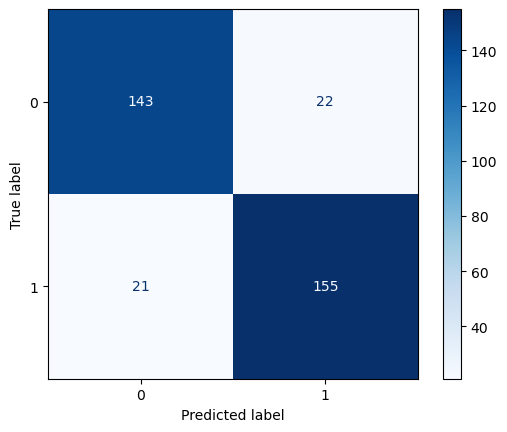

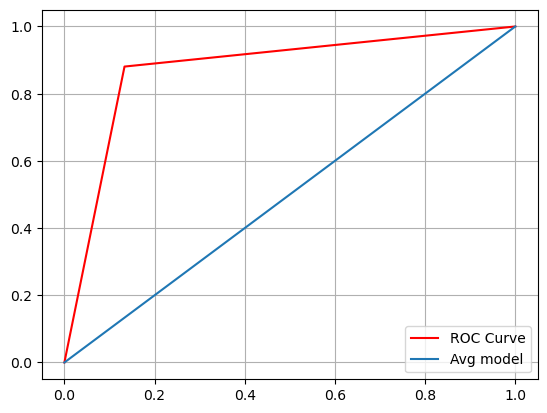

In [14]:
df=pd.read_csv(r"C:\Data Sets\preprocessd_data_cleaned.csv")
x=df.drop('churn',axis=1)
y=df['churn']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1234)
#Model development
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
#metrics
cox=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cox,display_labels=[0,1])
display.plot(cmap='Blues')
plt.show()
prob=dt.predict_proba(X_test)
label_1_prob=prob[:,1]# Secound column label=1

#roc auc curve
fpr,tpr,threshold=roc_curve(y_test,label_1_prob)
plt.plot(fpr,tpr,color='red',label='ROC Curve')
plt.plot([0,1],[0,1],label='Avg model')
plt.legend()
plt.grid()


**with hyperparameter tunung**

In [18]:
tp=(np.sum((y_test==1) & (y_pred==1)))
# True negative
tn=(np.sum((y_test==0) & (y_pred==0)))
# False positive
fp=(np.sum((y_test==0) & (y_pred==1)))
# False Negative
fn=(np.sum((y_test==1) & (y_pred==0)))

In [19]:
#Accuracy
acc=(tp+tn)/(tp+fp+fn+tn)
# PRecission
pr=tp/(tp+fp)
#recall
recall=tp/(tp+fn)
#f1
f1=2*pr*recall/(pr+recall)


In [21]:
from sklearn.metrics import auc
auc=auc(fpr,tpr)

In [27]:
# Prepare data
metrics = list(zip(['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_Curve'],
                   [acc, pr, recall, f1, auc]))

# Create DataFrame
df = pd.DataFrame(metrics, columns=['Metric', 'Score'])
df

,Metric,Score
0,Accuracy,0.873900
1,Precision,0.875706
2,Recall,0.880682
3,F1,0.878187
4,AUC_Curve,0.873674


In [3]:
import joblib
best_model=joblib.load('DT.joblib')


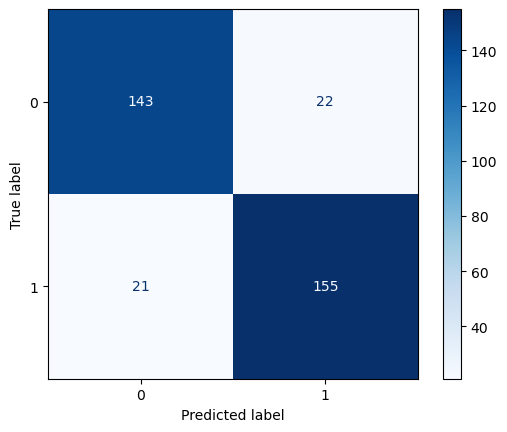

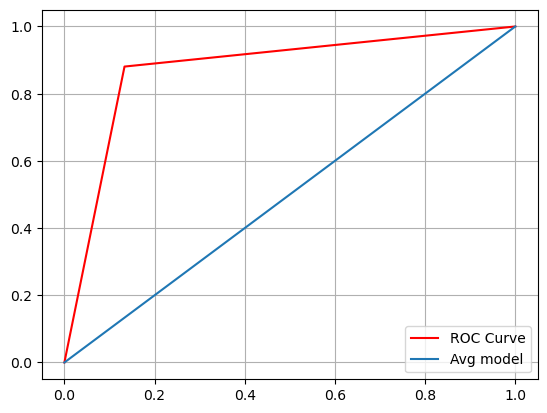

In [15]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1234)
#Model development
best_model.fit(X_train,y_train)
y_pred=dt.predict(X_test)
#metrics
cox=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(cox,display_labels=[0,1])
display.plot(cmap='Blues')
plt.show()
prob=dt.predict_proba(X_test)
label_1_prob=prob[:,1]# Secound column label=1

#roc auc curve
fpr,tpr,threshold=roc_curve(y_test,label_1_prob)
plt.plot(fpr,tpr,color='red',label='ROC Curve')
plt.plot([0,1],[0,1],label='Avg model')
plt.legend()
plt.grid()


In [28]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred,normalize='true').flatten()*100
tn, fp, fn, tp

(86.66666666666667, 13.333333333333334, 11.931818181818182, 88.06818181818183)

In [30]:
#Accuracy
acc=(tp+tn)/(tp+fp+fn+tn)
# PRecission
pr=tp/(tp+fp)
#recall
recall=tp/(tp+fn)
#f1
f1=2*pr*recall/(pr+recall)

In [31]:
# Prepare data
metrics = list(zip(['Accuracy', 'Precision', 'Recall', 'F1', 'AUC_Curve'],
                   [acc, pr, recall, f1, auc]))

# Create DataFrame
df = pd.DataFrame(metrics, columns=['Metric', 'Score'])

In [32]:
df

,Metric,Score
0,Accuracy,0.873674
1,Precision,0.868510
2,Recall,0.880682
3,F1,0.874553
4,AUC_Curve,0.873674
